# About The Dataset
The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset I used in this project was downloaded from Kaggle at [https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download&select=weatherAUS.csv)  
Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)  

The dataset contains observations of weather metrics for each day from 2008 to 2017, and includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| :------------ | :---------------------------------------------------- | :-------------- | :----- |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged over 10 minutes prior to 9am  | Compass Points  | object |
| WindDir3pm    | Wind direction averaged over 10 minutes prior to 3pm  | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged over 10 minutes prior to 9am      | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged over 10 minutes prior to 3pm      | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was at least 1mm of rain today               | Yes/No          | object |
| RainTomorrow  | If there is at least 1mm of rain tomorrow             | Yes/No          | object |



## Installing and importing the required libraries


In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn
!pip install xgboost

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import time

## Loading the data


In [3]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.count()

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

### Droping all rows with missing values


In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df = df.rename(columns={'RainToday': 'RainYesterday',
                        'RainTomorrow': 'RainToday'
                        })

## Selecting Important Locations

In [8]:
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]
df. info()

<class 'pandas.core.frame.DataFrame'>
Index: 7557 entries, 64191 to 80997
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7557 non-null   object 
 1   Location       7557 non-null   object 
 2   MinTemp        7557 non-null   float64
 3   MaxTemp        7557 non-null   float64
 4   Rainfall       7557 non-null   float64
 5   Evaporation    7557 non-null   float64
 6   Sunshine       7557 non-null   float64
 7   WindGustDir    7557 non-null   object 
 8   WindGustSpeed  7557 non-null   float64
 9   WindDir9am     7557 non-null   object 
 10  WindDir3pm     7557 non-null   object 
 11  WindSpeed9am   7557 non-null   float64
 12  WindSpeed3pm   7557 non-null   float64
 13  Humidity9am    7557 non-null   float64
 14  Humidity3pm    7557 non-null   float64
 15  Pressure9am    7557 non-null   float64
 16  Pressure3pm    7557 non-null   float64
 17  Cloud9am       7557 non-null   float64
 18  Cloud3pm

### Creating a function to map dates to seasons


In [9]:
def date_to_season(date):
    month=date.month
    if((month==12)or(month==1)or(month==2)):
        return 'Summer'
    elif((month==3)or(month==4)or(month==5)):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
         return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
         return 'Spring'

## Maping the dates to seasons and drop the Date column

In [10]:
df['Date']=pd.to_datetime(df['Date'])
df['Season']=df['Date'].apply(date_to_season)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday,Season
64191,2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,Summer
64192,2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,Summer
64193,2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,Summer
64194,2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,Summer
64195,2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80992,2017-06-20,Watsonia,3.6,14.5,0.0,2.4,8.8,NNE,41.0,ENE,...,66.0,1028.4,1025.0,1.0,7.0,5.2,13.8,No,No,Winter
80994,2017-06-22,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,...,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,No,Winter
80995,2017-06-23,Watsonia,5.6,13.1,0.0,1.6,6.0,NNW,52.0,NE,...,67.0,1019.0,1014.0,1.0,7.0,8.8,11.6,No,Yes,Winter
80996,2017-06-24,Watsonia,6.9,12.1,3.2,1.8,5.6,SSW,24.0,WNW,...,61.0,1018.7,1017.3,2.0,7.0,7.9,11.0,Yes,No,Winter


## Defining the feature and target dataframes

In [11]:
X=df.drop(columns=['RainToday','Date'],axis=1)
y=df['RainToday']

## Visualizing the Data

C:\Users\Rajveer Gupta\AppData\Local\Temp\ipykernel_23804\85655005.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(X['Location']).plot(kind='bar')


<Axes: xlabel='Location'>

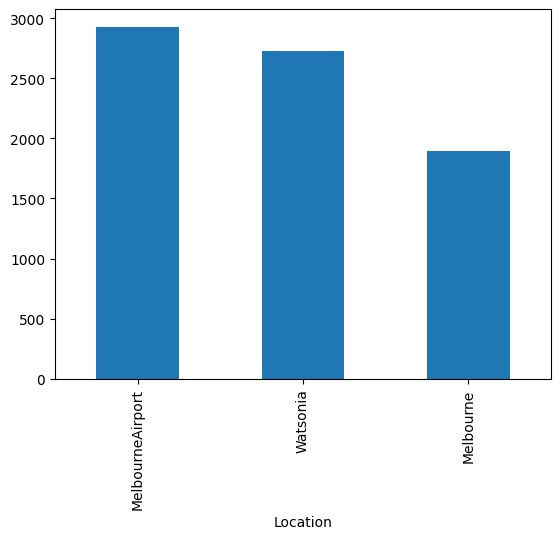

In [12]:
pd.value_counts(X['Location']).plot(kind='bar')

## Spliting data into training and test sets, ensuring target stratification

In [13]:
# Write your response.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [14]:
X_train.dropna()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6045 entries, 66362 to 80139
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       6045 non-null   object 
 1   MinTemp        6045 non-null   float64
 2   MaxTemp        6045 non-null   float64
 3   Rainfall       6045 non-null   float64
 4   Evaporation    6045 non-null   float64
 5   Sunshine       6045 non-null   float64
 6   WindGustDir    6045 non-null   object 
 7   WindGustSpeed  6045 non-null   float64
 8   WindDir9am     6045 non-null   object 
 9   WindDir3pm     6045 non-null   object 
 10  WindSpeed9am   6045 non-null   float64
 11  WindSpeed3pm   6045 non-null   float64
 12  Humidity9am    6045 non-null   float64
 13  Humidity3pm    6045 non-null   float64
 14  Pressure9am    6045 non-null   float64
 15  Pressure3pm    6045 non-null   float64
 16  Cloud9am       6045 non-null   float64
 17  Cloud3pm       6045 non-null   float64
 18  Temp9am 

## Defining preprocessing features for numerical and categorical features

In [15]:
numeric_features=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
                  'Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
categorical_features=['Location','WindGustDir','WindDir9am','WindDir3pm','RainYesterday','Season']

### Defining separate transformers for both feature types and combining them into a single preprocessing transformer


In [16]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

## Combining the transformers into a single preprocessing column transformer

In [17]:
preprocessor=ColumnTransformer([('num',numeric_transformer,numeric_features),
                               ('cat',categorical_transformer,categorical_features)])

## Creating a pipeline by combining the preprocessing with a Random Forest classifier

In [18]:
pipeline=Pipeline([('preprocessor',preprocessor),
                   ('classifier',RandomForestClassifier(n_estimators=90))])
start_time=time.time()
pipeline.fit(X_train,y_train)
end_time=time.time()
time_RandomForestClassifier=end_time-start_time

### Training the model using XGBClassifier

In [19]:
pipeline_XGB=Pipeline([('preprocessor',preprocessor),
                      ('XGBClassifier',XGBClassifier(n_estimators=90))])
y_train=LabelEncoder().fit_transform(y_train)
start_time_xgb=time.time()
pipeline_XGB.fit(X_train,y_train)
end_time_xgb=time.time()
time_XGB=end_time_xgb-start_time_xgb

## Displaying both  model's estimated score and time taken to train both the models

In [20]:
y_pred=pipeline.predict(X_test)
y_pred_xgb=pipeline_XGB.predict(X_test)
test_score_RandomForest=accuracy_score(y_test,y_pred)
y_test_xgb=LabelEncoder().fit_transform(y_test)
test_score_XGB=accuracy_score(y_test_xgb,y_pred_xgb)
print('Score of Random Forest Classifier=',test_score_RandomForest)
print('Score of XGB Classifier=',test_score_XGB)
print('Time taken for RandomForestClassifier',time_RandomForestClassifier)
print('Time taken for RandomForestClassifier',time_RandomForestClassifier)

Score of Random Forest Classifier= 0.8604497354497355
Score of XGB Classifier= 0.8657407407407407
Time taken for RandomForestClassifier 1.0404272079467773
Time taken for RandomForestClassifier 1.0404272079467773


## Printing the classification report of both the models

In [21]:
print('Classification report of Random Forest Classifier',classification_report(y_pred,y_test))
print('Classification report of XGB Classifier',classification_report(y_pred_xgb,y_test_xgb))

Classification report of Random Forest Classifier               precision    recall  f1-score   support

          No       0.95      0.88      0.91      1247
         Yes       0.57      0.78      0.66       265

    accuracy                           0.86      1512
   macro avg       0.76      0.83      0.79      1512
weighted avg       0.88      0.86      0.87      1512

Classification report of XGB Classifier               precision    recall  f1-score   support

           0       0.95      0.88      0.91      1233
           1       0.60      0.78      0.68       279

    accuracy                           0.87      1512
   macro avg       0.78      0.83      0.80      1512
weighted avg       0.88      0.87      0.87      1512



## Ploting  the confusion matrix of both the models

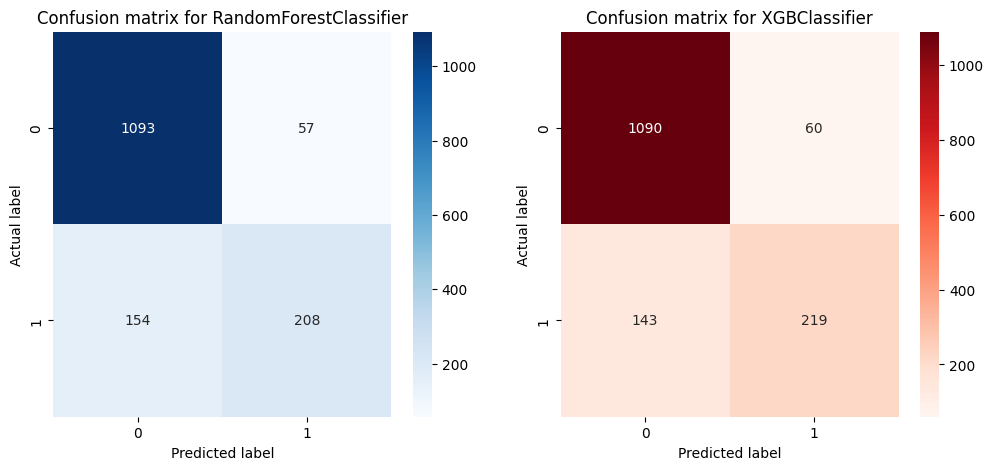

In [22]:
conf_matrix_randomforest=confusion_matrix(y_test,y_pred)
conf_matrix_xgb=confusion_matrix(y_test_xgb,y_pred_xgb)
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.heatmap(conf_matrix_randomforest,annot=True,cmap='Blues',fmt='d',ax=axes[0])
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('Actual label')
axes[0].set_title('Confusion matrix for RandomForestClassifier')
sns.heatmap(conf_matrix_xgb,annot=True,cmap='Reds',fmt='d',ax=axes[1])
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('Actual label')
axes[1].set_title('Confusion matrix for XGBClassifier')
plt.show()